<a href="https://colab.research.google.com/github/DBCooper200/project/blob/main/10support_vector_machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
from sklearn.datasets import load_iris
iris=load_iris()

The iris dataset is a classic and very easy multi-class classification
dataset.
=================   ==============

Classes                          3

Samples per class               50

Samples total                  150

Dimensionality                   4
       
Features            real, positive

=================   ==============

This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

The below plot uses the first two features. See here for more information on this dataset.



In [17]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [14]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [23]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [18]:
len(iris.data)#data holds samples being tested and feature_names holds columns

150

In [20]:
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [22]:
df['target']=iris.target 
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [25]:
iris.target_names #setosa=0 versicolor=1 viginica=2

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [26]:
df[df.target==1]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1
56,6.3,3.3,4.7,1.6,1
57,4.9,2.4,3.3,1.0,1
58,6.6,2.9,4.6,1.3,1
59,5.2,2.7,3.9,1.4,1


In [30]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [29]:
df[df.target==0].tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
45,4.8,3.0,1.4,0.3,0
46,5.1,3.8,1.6,0.2,0
47,4.6,3.2,1.4,0.2,0
48,5.3,3.7,1.5,0.2,0
49,5.0,3.3,1.4,0.2,0


In [32]:
df['flower_name']=df.target.apply(lambda x: iris.target_names[x])
df
'''
x = lambda a: a + 10
print(x(5))
op=>15

x = lambda a, b: a * b
print(x(5, 6))
op=>30
'''

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [33]:
from matplotlib import pyplot as plt

In [ ]:
%matplotlib inline

In [34]:
df0=df[df.target==0]
df1=df[df.target==1]
df2=df[df.target==2]

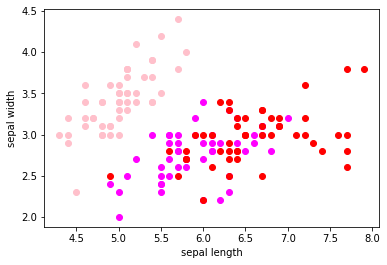

In [36]:
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color="pink")
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color="magenta")
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color="red")

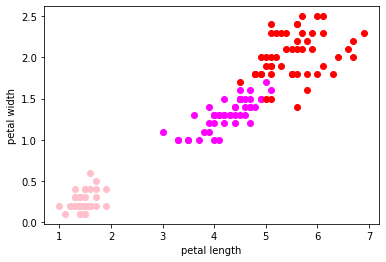

In [37]:
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color="pink")
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color="magenta")
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color="red")

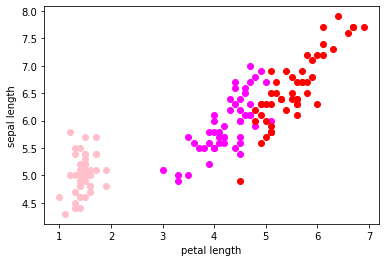

In [38]:
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.scatter(df0['petal length (cm)'], df0['sepal length (cm)'], color="pink")
plt.scatter(df1['petal length (cm)'], df1['sepal length (cm)'], color="magenta")
plt.scatter(df2['petal length (cm)'], df2['sepal length (cm)'], color="red")

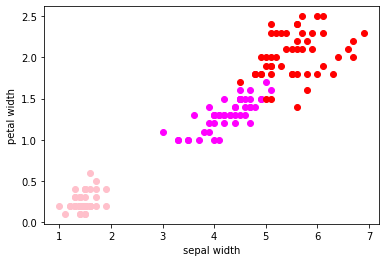

In [39]:
plt.xlabel('sepal width')
plt.ylabel('petal width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color="pink")
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color="magenta")
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color="red")

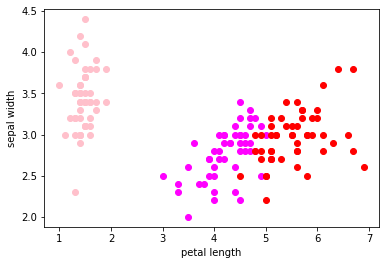

In [40]:
plt.xlabel('petal length')
plt.ylabel('sepal width')
plt.scatter(df0['petal length (cm)'], df0['sepal width (cm)'], color="pink")
plt.scatter(df1['petal length (cm)'], df1['sepal width (cm)'], color="magenta")
plt.scatter(df2['petal length (cm)'], df2['sepal width (cm)'], color="red")

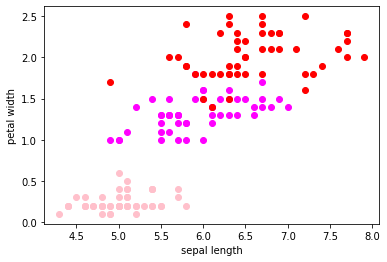

In [41]:
plt.xlabel('sepal length')
plt.ylabel('petal width')
plt.scatter(df0['sepal length (cm)'], df0['petal width (cm)'], color="pink")
plt.scatter(df1['sepal length (cm)'], df1['petal width (cm)'], color="magenta")
plt.scatter(df2['sepal length (cm)'], df2['petal width (cm)'], color="red")

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X=df.drop(['target','flower_name'],axis="columns")
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [45]:
y=df.target
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [49]:
len(X_train),len(X_test),len(y_train),len(y_test)

(120, 30, 120, 30)

In [50]:
from sklearn.svm import SVC
model=SVC()

In [51]:
model.fit(X_train,y_train)

SVC()

In [52]:
model.score(X_test,y_test)

1.0

if c i.e. regularization increases and overfitting occurs then accuracy decreases

In [53]:
SVC?